In [2]:
# import required modules

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

print(tf.__version__)

2.8.0


In [3]:
# get mnist data 

path = 'mnist.npz'

# get data - this will be cached 
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


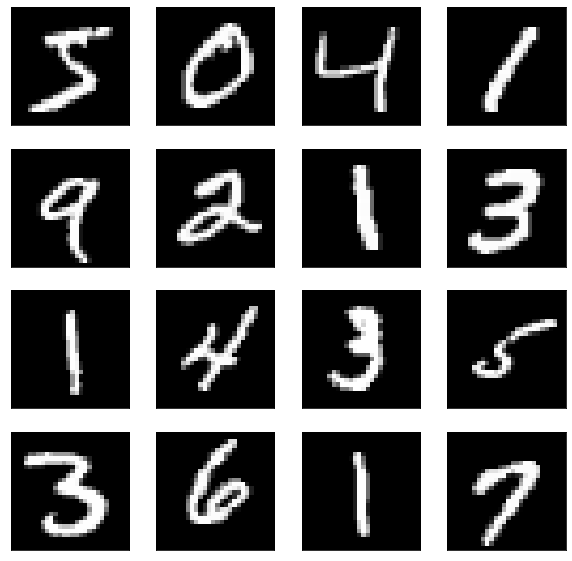

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], aspect=1, cmap='gray')
plt.show()

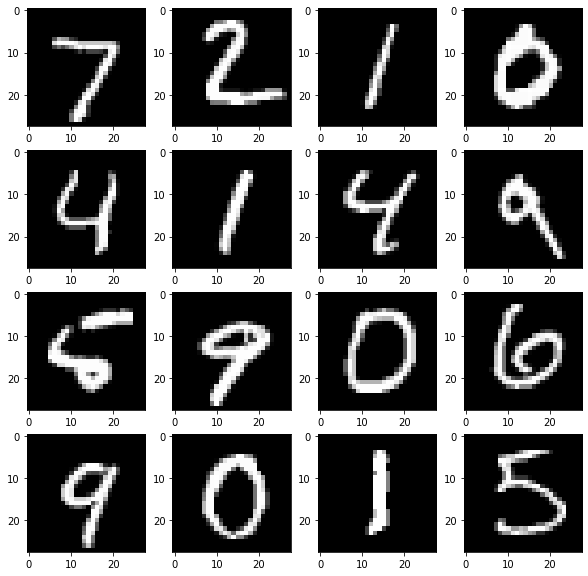

In [6]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i], aspect=1, cmap='gray')
plt.show()

Now let us set up a TF model and train the data.

In [7]:
# set up TF model and train 


# callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
                            
callbacks = myCallback()

# normalise 
x_train, x_test = x_train/255.0, x_test/255.0

# create model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# fit model
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2038 - accuracy: 0.9405
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0811 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9829
Epo

In [8]:
res = model.predict(x_test[11:12])
print(res)

[[2.0358445e-06 6.5885748e-11 6.0840697e-09 2.7483347e-11 2.0443018e-08
  2.4772208e-07 9.9999726e-01 6.3218092e-10 4.2959860e-07 7.1349905e-11]]


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
res = probability_model.predict(x_test[11:12])
index = np.argmax(res)
print(res)
print(index)

[[0.08533695 0.08533678 0.08533678 0.08533678 0.08533678 0.0853368
  0.23196878 0.08533678 0.08533681 0.08533678]]
6


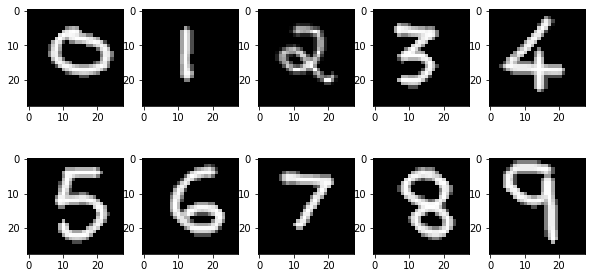

In [10]:
# display the digit images we created 
img_names = ['0.png', '1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
imgs = [np.array(Image.open(img_name)) for img_name in img_names]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[i], aspect=1, cmap='gray')
plt.show()

In [15]:
def predict():
    img_data = np.array(imgs)
    res = probability_model.predict(img_data)
    print([np.argmax(a) for a in res])
predict()

[9, 8, 2, 3, 6, 5, 6, 2, 8, 3]


In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())

# fit model
history2 = model2.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2769408   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
____________________________________________

(1, 28, 28, 1)
[[4.0426804e-11 1.2478693e-11 7.9094647e-11 3.2989497e-10 1.7761282e-12
  1.6711472e-10 6.9263446e-17 1.0000000e+00 8.5591945e-13 1.9940536e-09]]
[7]


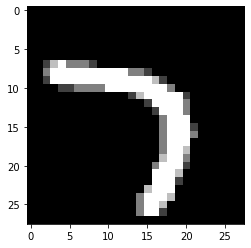

In [13]:
img_input = x_test[60:61]
print(img_input.shape)
res = model2.predict(img_input)
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')

[9, 8, 2, 3, 6, 5, 6, 2, 8, 3]
(10, 28, 28, 1)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[5]


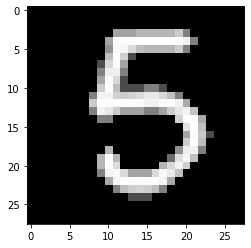

In [22]:
img_data = np.array(imgs)
res = probability_model.predict(img_data)
print([np.argmax(a) for a in res])
img_data = img_data.reshape(img_data.shape[0], 28, 28, 1)
img_input = img_data[5]
print(img_data.shape)
res = model2.predict(img_input.reshape(1, 28, 28, 1))
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')